In [5]:
#import libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [6]:
#load data 

df = pd.read_csv(r'C:\Users\04ama\OneDrive\chemistry\ADHD_SEX_Prediction\notebooks\Feature Engineering\final_dataset.csv')


In [7]:
#split data into train/validation/test
# Split data into train, validation, and test sets
# First split: train+val vs test
y = df['ADHD_Outcome']
X = df.drop(columns=['ADHD_Outcome','participant_id'], axis = 1)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Second split: train vs val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25 x 0.8 = 0.2

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


Train shape: (727, 24), Validation shape: (243, 24), Test shape: (243, 24)


Best parameters: {'C': 10, 'solver': 'lbfgs'}
Validation set performance:
0 {'precision': 0.6885245901639344, 'recall': 0.5526315789473685, 'f1-score': 0.6131386861313869, 'support': 76.0}
1 {'precision': 0.8131868131868132, 'recall': 0.8862275449101796, 'f1-score': 0.8481375358166189, 'support': 167.0}


Text(70.72222222222221, 0.5, 'True')

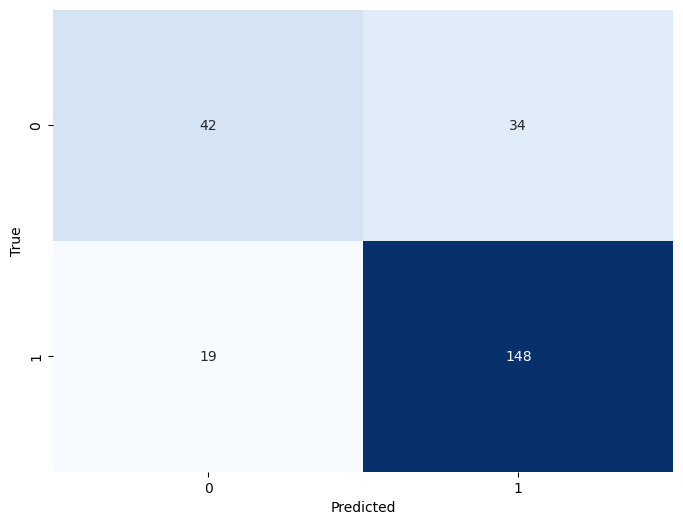

In [30]:
# grid search for logistic regression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
lr = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)

# Evaluate best model on validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)

print('Validation set performance:')

print('0', classification_report(y_val,y_val_pred,output_dict=True)['0'])
print('1',classification_report(y_val,y_val_pred,output_dict=True)['1'])
#heat map confusion matrix 
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')  

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
0 {'precision': 0.7391304347826086, 'recall': 0.4473684210526316, 'f1-score': 0.5573770491803278, 'support': 76.0}
1 {'precision': 0.7868020304568528, 'recall': 0.9281437125748503, 'f1-score': 0.8516483516483516, 'support': 167.0}


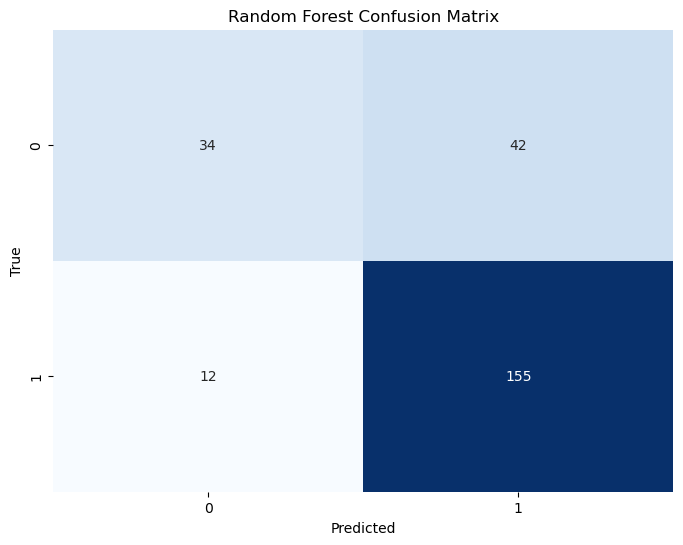

In [31]:
#grid search for random forest classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)
print('Best parameters:', grid_search_rf.best_params_)

#evaluate on validation set 
y_val_pred_rf = grid_search_rf.best_estimator_.predict(X_val)

print('0', classification_report(y_val,y_val_pred_rf,output_dict=True)['0'])
print('1',classification_report(y_val,y_val_pred_rf,output_dict=True)['1'])
cm = confusion_matrix(y_val, y_val_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
# Coefficient analysis for Logistic Regression
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names and coefficients
feature_names = X_train.columns
coefficients = grid_search.best_estimator_.coef_[0]

# Create a DataFrame for easy viewing
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values('Abs_Coefficient', ascending=False, inplace=True)

# Display top 20 features by absolute coefficient value
print(coef_df.head(20))

# Plot top 20 coefficients
plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'].head(20), coef_df['Coefficient'].head(20))
plt.xlabel('Coefficient Value')
plt.title('Top 20 Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()threshold = 0.6
y_val_pred_custom = (y_val_proba >= threshold).astype(int)

print(grid_search.best_estimator_)

cm = confusion_matrix(y_val, y_val_pred_custom)
plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')

print('0', classification_report(y_val,y_val_pred_custom,output_dict=True)['0'])
print('1',classification_report(y_val,y_val_pred_custom,output_dict=True)['1'])

LogisticRegression(C=10, max_iter=1000)
0 {'precision': 0.6486486486486487, 'recall': 0.631578947368421, 'f1-score': 0.64, 'support': 76.0}
1 {'precision': 0.834319526627219, 'recall': 0.844311377245509, 'f1-score': 0.8392857142857143, 'support': 167.0}


In [43]:
y_val_proba_rf = grid_search_rf.best_estimator_.predict_proba(X_val)[:, 1]  
y_val_pred_custom_rf = (y_val_proba_rf >= threshold).astype(int)

print(grid_search_rf.best_estimator_)

print('0', classification_report(y_val,y_val_pred_custom_rf,output_dict=True)['0'])
print('1',classification_report(y_val,y_val_pred_custom_rf,output_dict=True)['1'])
cm  = confusion_matrix(y_val, y_val_pred_custom_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')  
plt.show()

RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)
0 {'precision': 0.6567164179104478, 'recall': 0.5789473684210527, 'f1-score': 0.6153846153846154, 'support': 76.0}
1 {'precision': 0.8181818181818182, 'recall': 0.8622754491017964, 'f1-score': 0.8396501457725948, 'support': 167.0}


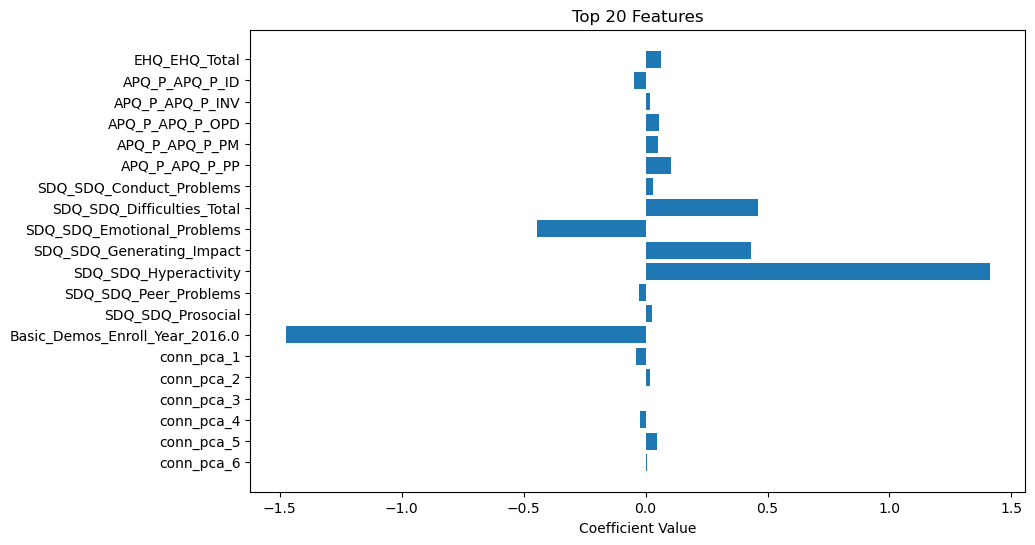

In [45]:
#Feature Interpretation 
#coeffecient analysis for LR
feature_names = X_train.columns
coefficients = grid_search.best_estimator_.coef_[0]
coef_df = pd.DataFrame({'Feature':feature_names, 'Coefficient': coefficients})

plt.figure(figsize = (10,6))
plt.barh(coef_df['Feature'].head(20),coef_df['Coefficient'].head(20))
plt.xlabel('Coefficient Value')
plt.title('Top 20 Features')
plt.gca().invert_yaxis()
plt.show()



Text(0.5, 1.0, 'Top 20 Feature Importances')

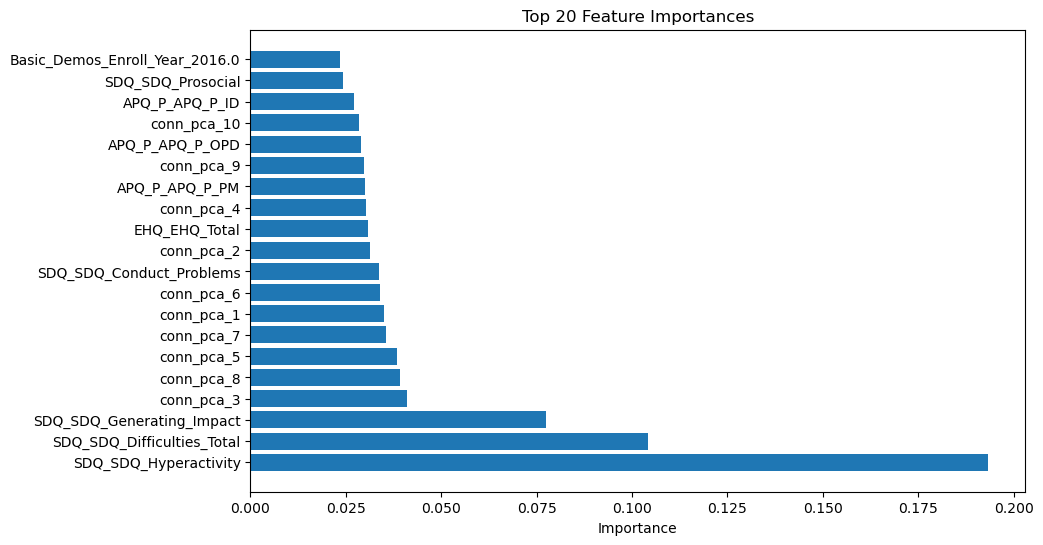

In [46]:
#feature importance plot for Random Forest
feature_importances = grid_search_rf.best_estimator_.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df.sort_values('Importance', ascending=False, inplace=True)
plt.figure(figsize=(10,6))  
plt.barh(importance_df['Feature'].head(20), importance_df['Importance'].head(20))
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')

In [49]:
# evalauting model on the untocuhed test set - chosen model is LR 
y_test_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
threshold = 0.6
y_test_pred_custom = (y_test_proba >= threshold).astype(int)
print('0', classification_report(y_test,y_test_pred_custom,output_dict=True)['0'])
print('1',classification_report(y_test,y_test_pred_custom,output_dict=True)['1'])
cm = confusion_matrix(y_test, y_test_pred_custom)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')

0 {'precision': 0.6266666666666667, 'recall': 0.6103896103896104, 'f1-score': 0.618421052631579, 'support': 77.0}
1 {'precision': 0.8214285714285714, 'recall': 0.8313253012048193, 'f1-score': 0.8263473053892215, 'support': 166.0}


Text(50.722222222222214, 0.5, 'True')